In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
import plotly.express as px
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import tensorflow.keras.models as Models
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Flatten
from tensorflow.keras.regularizers import l2
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
rwine_data = pd.read_csv(url_red, sep=';')
wwine_data = pd.read_csv(url_white, sep=';')

In [ ]:
wwine_data['goodquality'] = [0 if x <6  else 1 for x in wwine_data['quality']]
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

[Text(0, 0, 'fixed acidity'),
 Text(1, 0, 'volatile acidity'),
 Text(2, 0, 'citric acid'),
 Text(3, 0, 'residual sugar'),
 Text(4, 0, 'chlorides'),
 Text(5, 0, 'free sulfur dioxide'),
 Text(6, 0, 'total sulfur dioxide'),
 Text(7, 0, 'density'),
 Text(8, 0, 'pH'),
 Text(9, 0, 'sulphates'),
 Text(10, 0, 'alcohol'),
 Text(11, 0, 'quality'),
 Text(12, 0, 'goodquality')]

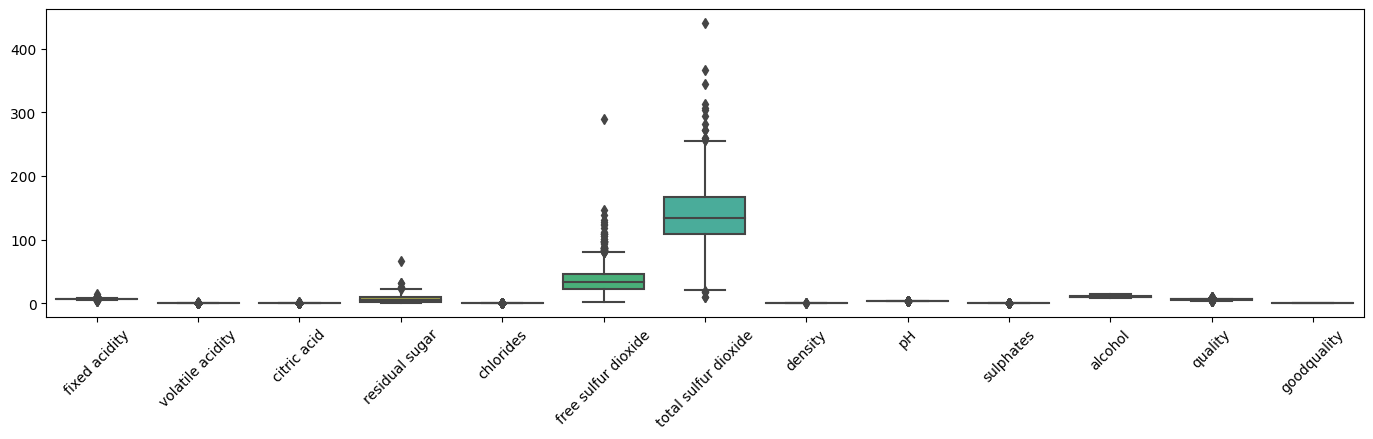

In [ ]:
#plot some data 
fig, ax = plt.subplots(1, figsize=(17,4))
ax = sns.boxplot(data=wwine_data)
ax.set_xticklabels(wwine_data.columns,rotation=45)

In [ ]:
print(wwine_data.columns)
co = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'goodquality']

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'goodquality'],
      dtype='object')


(4898, 13)
(4682, 13)
(4630, 13)


[Text(0, 0, 'fixed acidity'),
 Text(1, 0, 'volatile acidity'),
 Text(2, 0, 'citric acid'),
 Text(3, 0, 'residual sugar'),
 Text(4, 0, 'chlorides'),
 Text(5, 0, 'free sulfur dioxide'),
 Text(6, 0, 'total sulfur dioxide'),
 Text(7, 0, 'density'),
 Text(8, 0, 'pH'),
 Text(9, 0, 'sulphates'),
 Text(10, 0, 'alcohol'),
 Text(11, 0, 'quality'),
 Text(12, 0, 'goodquality')]

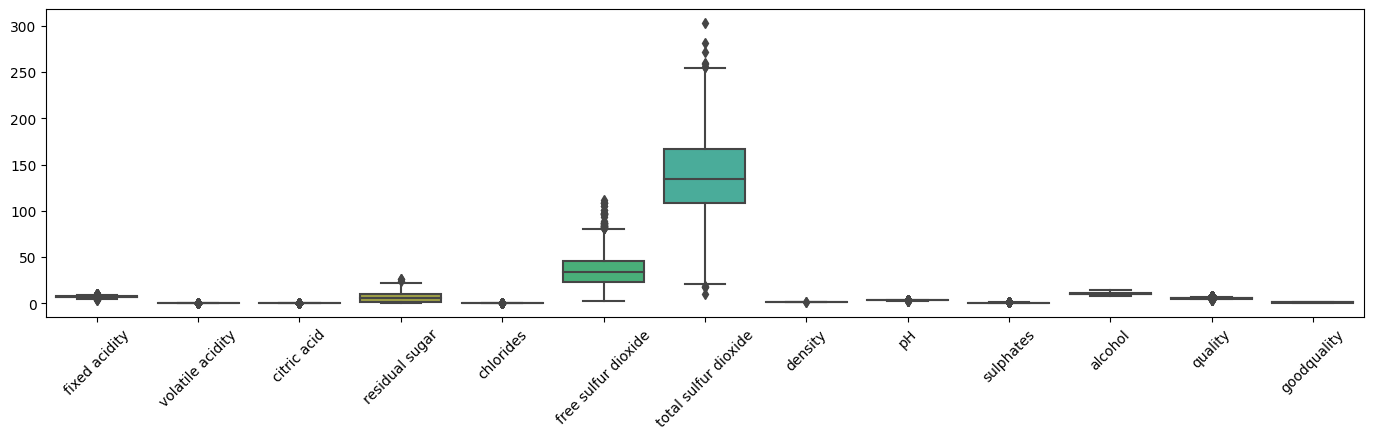

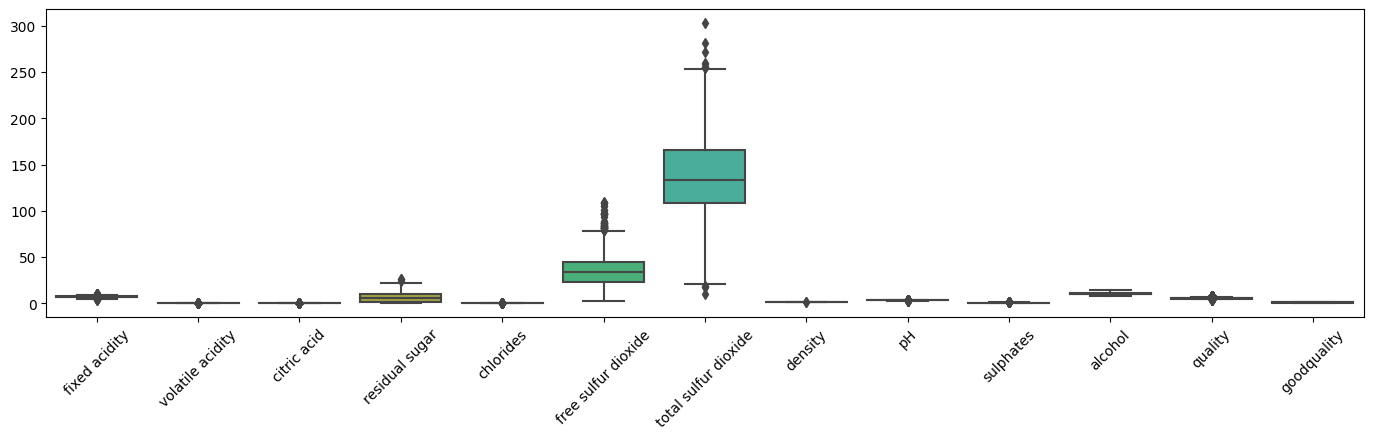

In [ ]:
print(wwine_data.shape)
for item in range(len(co)):
  probable_outliers_tm, possible_outliers_tm = tukeys_method(wwine_data, co[item])
  wwine_data = wwine_data.drop(probable_outliers_tm)
  wwine_data.reset_index(drop=True, inplace=True)
print(wwine_data.shape)
#plot some data 
fig, ax = plt.subplots(1, figsize=(17,4))
ax = sns.boxplot(data=wwine_data)
ax.set_xticklabels(wwine_data.columns,rotation=45)
for item in range(len(co)):
  probable_outliers_tm, possible_outliers_tm = tukeys_method(wwine_data, co[item])
  wwine_data = wwine_data.drop(probable_outliers_tm)
  wwine_data.reset_index(drop=True, inplace=True)
print(wwine_data.shape)
#plot some data 
fig, ax = plt.subplots(1, figsize=(17,4))
ax = sns.boxplot(data=wwine_data)
ax.set_xticklabels(wwine_data.columns,rotation=45)

In [ ]:
X = wwine_data.drop(['quality','goodquality', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates'], axis = 1)
y = wwine_data['goodquality']

In [ ]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'pH', 'alcohol'],
      dtype='object')

[Text(0, 0, 'fixed acidity'),
 Text(1, 0, 'volatile acidity'),
 Text(2, 0, 'citric acid'),
 Text(3, 0, 'residual sugar'),
 Text(4, 0, 'pH'),
 Text(5, 0, 'alcohol')]

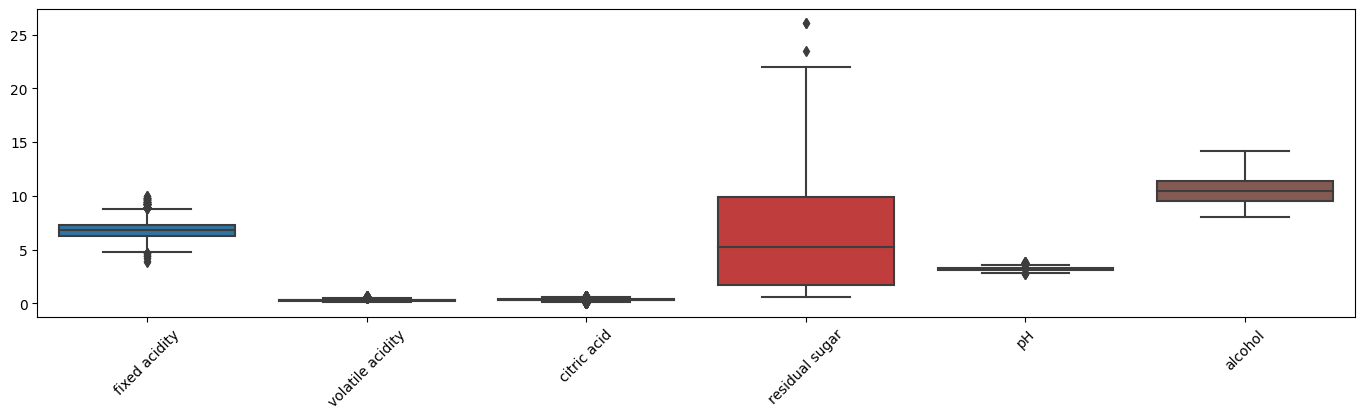

In [ ]:
#plot some data 
fig, ax = plt.subplots(1, figsize=(17,4))
ax = sns.boxplot(data=X)
ax.set_xticklabels(X.columns,rotation=45)

[Text(0, 0, 'fixed acidity'),
 Text(1, 0, 'volatile acidity'),
 Text(2, 0, 'citric acid'),
 Text(3, 0, 'residual sugar'),
 Text(4, 0, 'pH'),
 Text(5, 0, 'alcohol')]

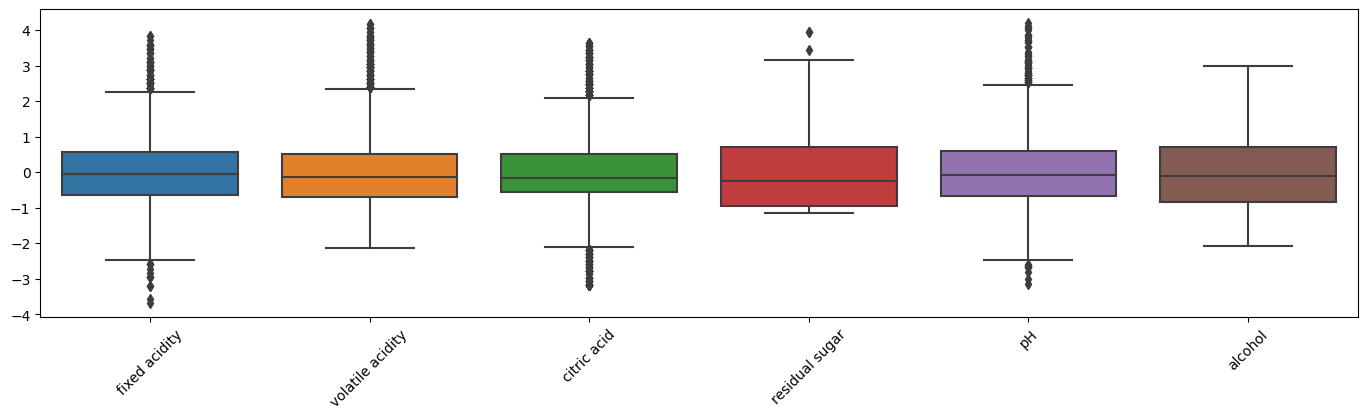

In [ ]:
# Normalize feature variables
#X1 = StandardScaler().fit_transform(X)
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'pH', 'alcohol'])
#plot the normalized data
fig, ax = plt.subplots(1, figsize=(17,4))
ax = sns.boxplot(data=X)
ax.set_xticklabels(X.columns,rotation=45)

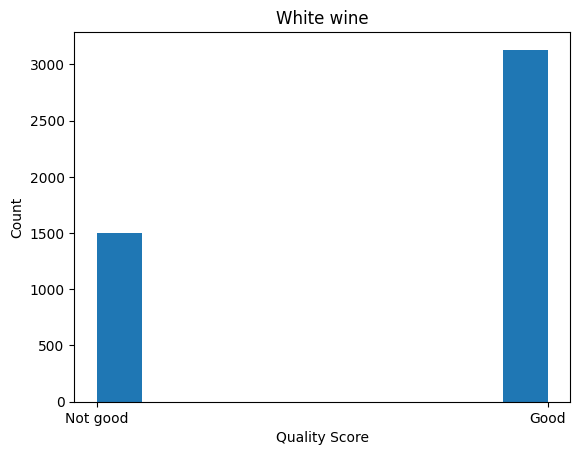

In [ ]:
plt.hist(y)
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.xticks([0,1], labels=['Not good', 'Good'])
plt.title('White wine')
plt.show()

In [ ]:
oversample = SMOTE(sampling_strategy='auto')
X_ov, y_ov = oversample.fit_resample(X, y)

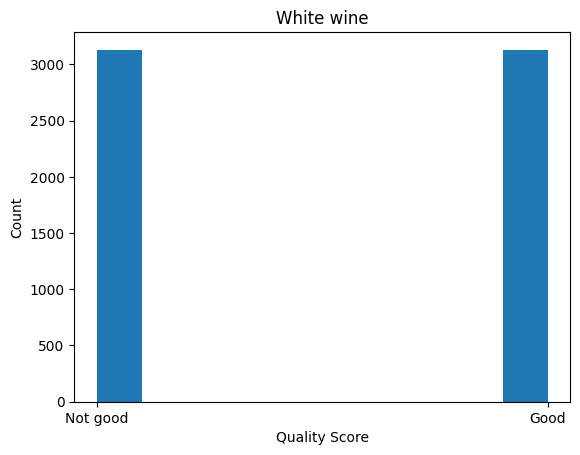

In [ ]:
plt.hist(y_ov)
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.xticks([0,1], labels=['Not good', 'Good'])
plt.title('White wine')
plt.show()

In [ ]:
f1_scores = {'train':{'Decision Tree': 0, 'Random Forest': 0, 'Logistic Regression': 0, 'SVM': 0, 'KNN': 0, 'Naive Bayes': 0, 'Ada Boost': 0, 'Gradient Boosting': 0, 'XGBoost': 0, 'lightGBM':0, 'EN_HARD': 0, 'EN_SOFT': 0},
             'test':{'Decision Tree': 0, 'Random Forest': 0, 'Logistic Regression': 0, 'SVM': 0, 'KNN': 0, 'Naive Bayes': 0, 'Ada Boost': 0, 'Gradient Boosting': 0, 'XGBoost': 0, 'lightGBM':0, 'EN_HARD': 0, 'EN_SOFT': 0}}
acc_scores = {'train':{'Decision Tree': 0, 'Random Forest': 0, 'Logistic Regression': 0, 'SVM': 0, 'KNN': 0, 'Naive Bayes': 0, 'Ada Boost': 0, 'Gradient Boosting': 0, 'XGBoost': 0, 'lightGBM':0, 'EN_HARD': 0, 'EN_SOFT': 0},
             'test':{'Decision Tree': 0, 'Random Forest': 0, 'Logistic Regression': 0, 'SVM': 0, 'KNN': 0, 'Naive Bayes': 0, 'Ada Boost': 0, 'Gradient Boosting': 0, 'XGBoost': 0, 'lightGBM':0, 'EN_HARD': 0, 'EN_SOFT': 0}}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ov, y_ov, test_size=0.2)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       648
           1       0.80      0.80      0.80       604

    accuracy                           0.80      1252
   macro avg       0.80      0.80      0.80      1252
weighted avg       0.80      0.80      0.80      1252

Accuracy Score: 0.8043130990415336


<Axes: >

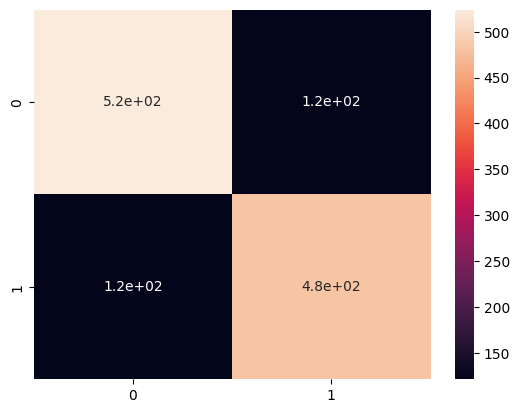

In [ ]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
y_pred11 = model1.predict(X_train)

f1_scores['train']['Decision Tree'] = f1_score(y_train, y_pred11)
f1_scores['test']['Decision Tree'] = f1_score(y_test, y_pred1)

acc_scores['train']['Decision Tree'] = accuracy_score(y_train, y_pred11)
acc_scores['test']['Decision Tree'] = accuracy_score(y_test, y_pred1)

print(classification_report(y_test, y_pred1))
print("Accuracy Score:",accuracy_score(y_test, y_pred1))
confu = confusion_matrix(y_test, y_pred1)
sns.heatmap(confu, annot= True)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       648
           1       0.87      0.85      0.86       604

    accuracy                           0.87      1252
   macro avg       0.87      0.87      0.87      1252
weighted avg       0.87      0.87      0.87      1252

Accuracy Score: 0.865814696485623


<Axes: >

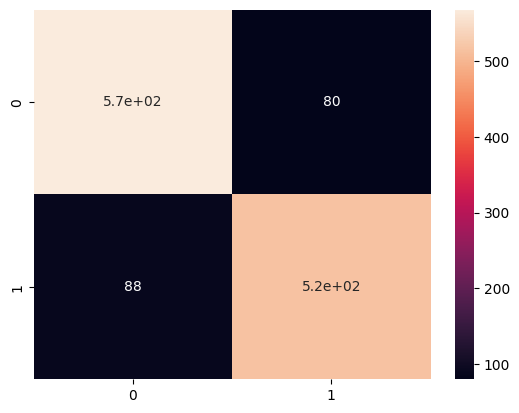

In [ ]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
y_pred22 = model2.predict(X_train)

f1_scores['train']['Random Forest'] = f1_score(y_train, y_pred22)
f1_scores['test']['Random Forest'] = f1_score(y_test, y_pred2)

acc_scores['train']['Random Forest'] = accuracy_score(y_train, y_pred22)
acc_scores['test']['Random Forest'] = accuracy_score(y_test, y_pred2)

print(classification_report(y_test, y_pred2))
print("Accuracy Score:",accuracy_score(y_test, y_pred2))
confu = confusion_matrix(y_test, y_pred2)
sns.heatmap(confu, annot= True)

              precision    recall  f1-score   support

           0       0.73      0.74      0.74       648
           1       0.72      0.71      0.72       604

    accuracy                           0.73      1252
   macro avg       0.73      0.73      0.73      1252
weighted avg       0.73      0.73      0.73      1252

Accuracy Score: 0.7284345047923323


<Axes: >

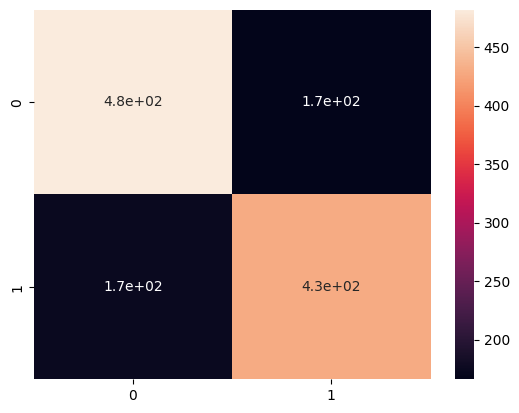

In [ ]:
model3 = LogisticRegression()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
y_pred33 = model3.predict(X_train)

f1_scores['train']['Logistic Regression'] = f1_score(y_train, y_pred33)
f1_scores['test']['Logistic Regression'] = f1_score(y_test, y_pred3)

acc_scores['train']['Logistic Regression'] = accuracy_score(y_train, y_pred33)
acc_scores['test']['Logistic Regression'] = accuracy_score(y_test, y_pred3)

print(classification_report(y_test, y_pred3))
print("Accuracy Score:",accuracy_score(y_test, y_pred3))
confu = confusion_matrix(y_test, y_pred3)
sns.heatmap(confu, annot= True)

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       648
           1       0.76      0.75      0.76       604

    accuracy                           0.77      1252
   macro avg       0.76      0.76      0.76      1252
weighted avg       0.77      0.77      0.77      1252

Accuracy Score: 0.7651757188498403


<Axes: >

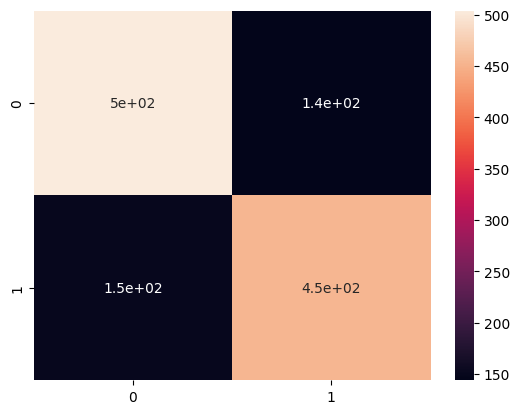

In [ ]:
model4 = SVC(kernel = "rbf")
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
y_pred44 = model4.predict(X_train)

f1_scores['train']['SVM'] = f1_score(y_train, y_pred44)
f1_scores['test']['SVM'] = f1_score(y_test, y_pred4)

acc_scores['train']['SVM'] = accuracy_score(y_train, y_pred44)
acc_scores['test']['SVM'] = accuracy_score(y_test, y_pred4)

print(classification_report(y_test, y_pred4))
print("Accuracy Score:",accuracy_score(y_test, y_pred4))
confu = confusion_matrix(y_test, y_pred4)
sns.heatmap(confu, annot= True)

              precision    recall  f1-score   support

           0       0.75      0.94      0.84       648
           1       0.91      0.67      0.77       604

    accuracy                           0.81      1252
   macro avg       0.83      0.81      0.80      1252
weighted avg       0.83      0.81      0.81      1252

Accuracy Score: 0.8099041533546326


<Axes: >

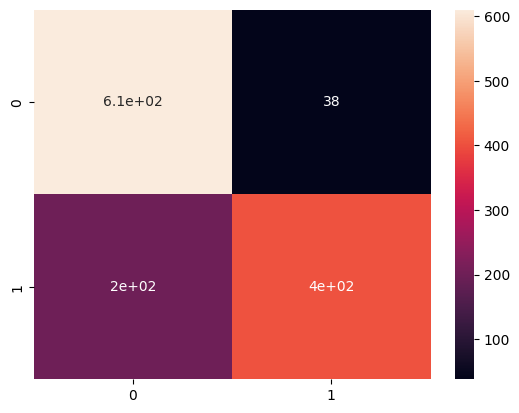

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier(n_neighbors = 2)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
y_pred55 = model5.predict(X_train)

f1_scores['train']['KNN'] = f1_score(y_train, y_pred55)
f1_scores['test']['KNN'] = f1_score(y_test, y_pred5)

acc_scores['train']['KNN'] = accuracy_score(y_train, y_pred55)
acc_scores['test']['KNN'] = accuracy_score(y_test, y_pred5)
print(classification_report(y_test, y_pred5))
print("Accuracy Score:",accuracy_score(y_test, y_pred5))
confu = confusion_matrix(y_test, y_pred5)
sns.heatmap(confu, annot= True)

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       648
           1       0.70      0.67      0.68       604

    accuracy                           0.70      1252
   macro avg       0.70      0.70      0.70      1252
weighted avg       0.70      0.70      0.70      1252

Accuracy Score: 0.700479233226837


<Axes: >

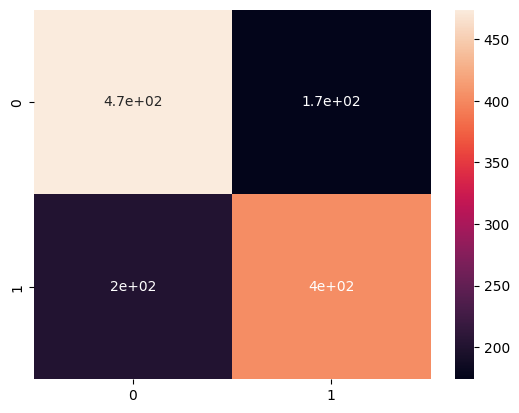

In [ ]:
model6 = GaussianNB()
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
y_pred66 = model6.predict(X_train)

f1_scores['train']['Naive Bayes'] = f1_score(y_train, y_pred66)
f1_scores['test']['Naive Bayes'] = f1_score(y_test, y_pred6)

acc_scores['train']['Naive Bayes'] = accuracy_score(y_train, y_pred66)
acc_scores['test']['Naive Bayes'] = accuracy_score(y_test, y_pred6)

print(classification_report(y_test, y_pred6))
print("Accuracy Score:",accuracy_score(y_test, y_pred6))
confu = confusion_matrix(y_test, y_pred6)
sns.heatmap(confu, annot= True)

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       648
           1       0.75      0.73      0.74       604

    accuracy                           0.75      1252
   macro avg       0.75      0.75      0.75      1252
weighted avg       0.75      0.75      0.75      1252

Accuracy Score: 0.7547923322683706


<Axes: >

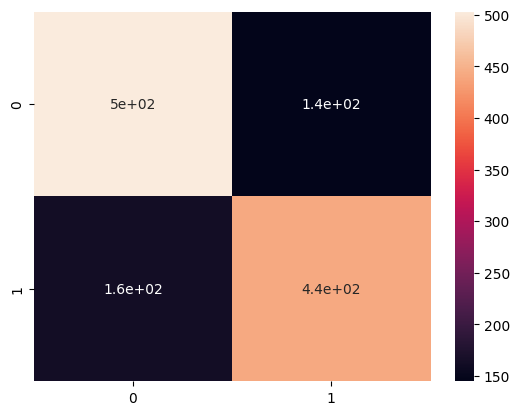

In [ ]:
model7 = AdaBoostClassifier()
model7.fit(X_train, y_train)
y_pred7 = model7.predict(X_test)
y_pred77 = model7.predict(X_train)

f1_scores['train']['Ada Boost'] = f1_score(y_train, y_pred77)
f1_scores['test']['Ada Boost'] = f1_score(y_test, y_pred7)

acc_scores['train']['Ada Boost'] = accuracy_score(y_train, y_pred77)
acc_scores['test']['Ada Boost'] = accuracy_score(y_test, y_pred7)
print(classification_report(y_test, y_pred7))
print("Accuracy Score:",accuracy_score(y_test, y_pred7))
confu = confusion_matrix(y_test, y_pred7)
sns.heatmap(confu, annot= True)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       648
           1       0.78      0.77      0.78       604

    accuracy                           0.79      1252
   macro avg       0.79      0.79      0.79      1252
weighted avg       0.79      0.79      0.79      1252

Accuracy Score: 0.7883386581469649


<Axes: >

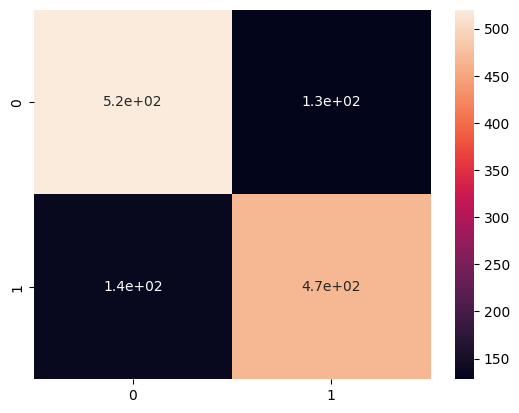

In [ ]:
model8 = GradientBoostingClassifier()
model8.fit(X_train, y_train)
y_pred8 = model8.predict(X_test)

y_pred88 = model8.predict(X_train)

f1_scores['train']['Gradient Boosting'] = f1_score(y_train, y_pred88)
f1_scores['test']['Gradient Boosting'] = f1_score(y_test, y_pred8)

acc_scores['train']['Gradient Boosting'] = accuracy_score(y_train, y_pred88)
acc_scores['test']['Gradient Boosting'] = accuracy_score(y_test, y_pred8)

print(classification_report(y_test, y_pred8))
print("Accuracy Score:",accuracy_score(y_test, y_pred8))
confu = confusion_matrix(y_test, y_pred8)
sns.heatmap(confu, annot= True)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       648
           1       0.85      0.88      0.86       604

    accuracy                           0.87      1252
   macro avg       0.87      0.87      0.87      1252
weighted avg       0.87      0.87      0.87      1252

Accuracy Score: 0.8666134185303515


<Axes: >

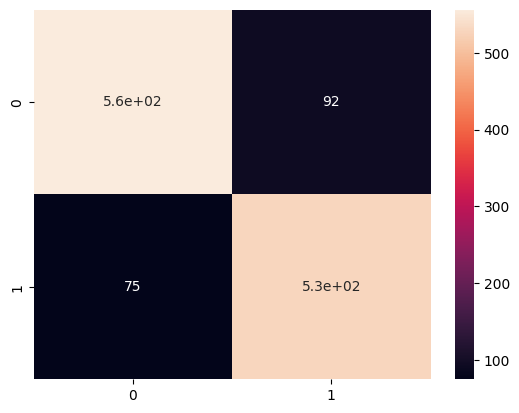

In [ ]:
model9 = xgb.XGBClassifier()
model9.fit(X_train, y_train)
y_pred9 = model9.predict(X_test)
y_pred99 = model9.predict(X_train)

f1_scores['train']['XGBoost'] = f1_score(y_train, y_pred99)
f1_scores['test']['XGBoost'] = f1_score(y_test, y_pred9)

acc_scores['train']['XGBoost'] = accuracy_score(y_train, y_pred99)
acc_scores['test']['XGBoost'] = accuracy_score(y_test, y_pred9)
print(classification_report(y_test, y_pred9))
print("Accuracy Score:",accuracy_score(y_test, y_pred9))
confu = confusion_matrix(y_test, y_pred9)
sns.heatmap(confu, annot= True)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       648
           1       0.85      0.86      0.86       604

    accuracy                           0.86      1252
   macro avg       0.86      0.86      0.86      1252
weighted avg       0.86      0.86      0.86      1252

Accuracy Score: 0.860223642172524


<Axes: >

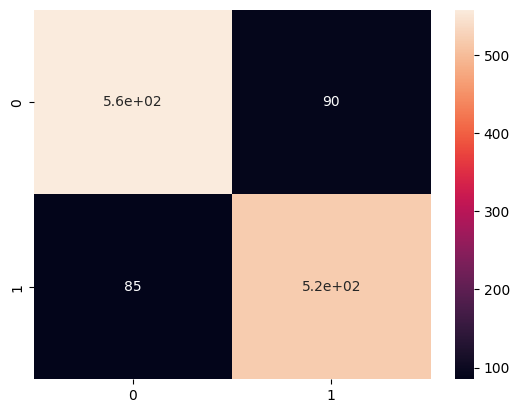

In [ ]:
import lightgbm as lgb
model10 = lgb.LGBMClassifier()
model10.fit(X_train, y_train)
y_pred10 = model10.predict(X_test)
y_pred101 = model10.predict(X_train)

f1_scores['train']['lightGBM'] = f1_score(y_train, y_pred101)
f1_scores['test']['lightGBM'] = f1_score(y_test, y_pred10)

acc_scores['train']['lightGBM'] = accuracy_score(y_train, y_pred101)
acc_scores['test']['lightGBM'] = accuracy_score(y_test, y_pred10)
print(classification_report(y_test, y_pred10))
print("Accuracy Score:",accuracy_score(y_test, y_pred10))
confu = confusion_matrix(y_test, y_pred10)
sns.heatmap(confu, annot= True)

In [ ]:
#TO DO:
#create a dictionary of our models
models = [#('Decision Tree',DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier()),
          #('Logistic Regression', LogisticRegression()),
          #('SVM', SVC(kernel='rbf', probability=True)),
          #('KNN', KNeighborsClassifier(n_neighbors = 2)),
          #('Naive Bayes', GaussianNB()),
          #('Ada Boost', AdaBoostClassifier()),
          #('Gradient Boosting', GradientBoostingClassifier()),
          ('XGBoost', xgb.XGBClassifier()),
          ('lightGBM', lgb.LGBMClassifier())
          ]  

#create our voting classifier, inputting our models
vot_soft = VotingClassifier(estimators = models, voting = 'soft')
vot_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('Random Forest', RandomForestClassifier()),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('lightGBM', LGBMClassifier())],
                 voting='soft')

In [ ]:
y_1 = vot_soft.predict(X_train)
y_2 = vot_soft.predict(X_test)

f1_scores['train']['EN_SOFT'] = f1_score(y_train, y_1)
f1_scores['test']['EN_SOFT'] = f1_score(y_test, y_2)
acc_scores['train']['EN_SOFT'] = accuracy_score(y_train, y_1)
acc_scores['test']['EN_SOFT'] = accuracy_score(y_test, y_2)

In [ ]:
#create our voting classifier, inputting our models
vot_hard = VotingClassifier(estimators = models)
vot_hard.fit(X_train, y_train)
y_3 = vot_hard.predict(X_train)
y_4 = vot_hard.predict(X_test)
f1_scores['train']['EN_HARD'] = f1_score(y_train, y_3)
f1_scores['test']['EN_HARD'] = f1_score(y_test, y_4)
acc_scores['train']['EN_HARD'] = accuracy_score(y_train, y_3)
acc_scores['test']['EN_HARD'] = accuracy_score(y_test, y_4)

In [ ]:
result1 = pd.DataFrame(f1_scores)
result1.columns=[['F1-score-training','F1-score-testing']]
result2 = pd.DataFrame(acc_scores)
result2.columns=[['Accuracy-score-training','Accuracy-score-testing']]

In [ ]:
result = pd.concat([result1,result2], axis=1 )
result.reset_index(inplace=True)
result.rename(columns={'index':'Algorithms'}, inplace=True)

result

,Algorithms,F1-score-training,F1-score-testing,Accuracy-score-training,Accuracy-score-testing
0,Decision Tree,0.999802,0.797688,0.999800,0.804313
1,Random Forest,0.999802,0.860000,0.999800,0.865815
2,Logistic Regression,0.716714,0.716667,0.720447,0.728435
3,SVM,0.773585,0.755408,0.774760,0.765176
4,KNN,0.912379,0.772467,0.918730,0.809904
5,Naive Bayes,0.696080,0.682472,0.704273,0.700479
6,Ada Boost,0.757178,0.742233,0.763578,0.754792
7,Gradient Boosting,0.810070,0.778982,0.811701,0.788339
8,XGBoost,0.973430,0.863673,0.973043,0.866613
9,lightGBM,0.938179,0.855730,0.937500,0.860224


In [ ]:
result.to_csv('10result.csv')